In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

fp = r"data/ph_tempdata.csv"

data = pd.read_csv(
    fp,
    na_values=["***"],
    usecols=["DATE", "STATION", "TEMP", "MAX", "MIN"],
    parse_dates=["DATE"]
)

# convert temperatures from Farenheit to Celsius
data["TEMP"] = (data["TEMP"] - 32)/1.8
data["MAX"] = (data["MAX"] - 32)/1.8
data["MIN"] = (data["MIN"] - 32)/1.8

# get only the data from the Mactan airport using the station code
data = data.loc[data["STATION"] == "RPM00098646"]

# convert the pandas data to num,py arrays that the code fitting algorithm can understand
days = data.index.to_numpy()
temps = data["TEMP"].to_numpy()

In [48]:
import scipy.stats as stats

res = stats.linregress(days, temps)

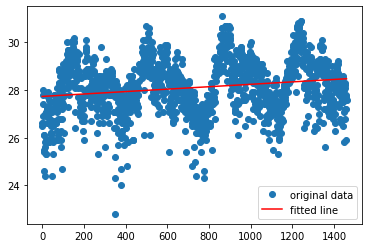

In [49]:
plt.plot(days, temps, 'o', label='original data')

plt.plot(days, res.intercept + res.slope*days, 'r', label='fitted line')

plt.legend()

plt.show()

In [53]:
res.slope  # the rate of increase in temperature per day

0.0005090103691423286

In [51]:
# parameters of a first guess

initial_slope = 0
initial_offset = np.mean(temps)

p0 = [initial_slope, initial_offset]

# create the function we want to fit
def my_line(x, m, b):
    return (m*x) + b


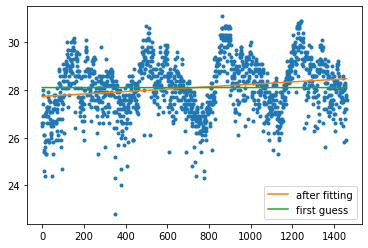

In [52]:
# now do the fit
fit = curve_fit(my_line, days, temps, p0=p0)

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = my_line(days, *p0)

# recreate the fitted curve using the optimized parameters
data_fit = my_line(days, *fit[0])

plt.plot(temps, '.')
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()


In [55]:
slope = fit[0][0]

In [64]:
print("Modeled teperature increase from 2017 to 2020 \n"
      "at Mactan International Airport: \n"
      f"{slope:.5f} degrees Celsius per day")

Modeled teperature increase from 2017 to 2020 
at Mactan International Airport: 
0.00051 degrees Celsius per day


In [66]:
print("Modeled teperature increase from 2017 to 2020 \n"
      "at Mactan International Airport: \n"
      f"{slope*365.25:.5f} degrees Celsius per year")

Modeled teperature increase from 2017 to 2020 
at Mactan International Airport: 
0.18592 degrees Celsius per year
